### Using the non-RUV corrected RNA data

In [2]:
!head /data/reddylab/Keith/encode4_duke/analysis/220118_KS151_AllPooled_ASTARR_Analysis/220119_KS151_Treg_ASTARR_AllPooled_DESeq2_resultsTable.txt

Geneid	Chr	Start	End	Strand	Length	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
chr1_3455375_3455597	chr1	3455375	3455597	+	223	20.7826554766876	0.0443756755538957	0.314379247533754	0.14115332326168	0.887748819428858	0.953752121151845
chr1_3671176_3671848	chr1	3671176	3671848	+	673	21.7741419395019	-1.3647380321074	0.387788762825563	-3.51928204975164	0.000432716411320124	0.00410940798132343
chr1_4491672_4493745	chr1	4491672	4493745	+	2074	113.941657869419	-0.861056674214786	0.175733040673284	-4.8997995534353	9.59344796110664e-07	1.7200308610623e-05
chr1_4496199_4497230	chr1	4496199	4497230	+	1032	79.8942897433482	-0.14217652540439	0.15907936249618	-0.893745883648513	0.371457869614513	0.624620973820702
chr1_4571545_4572139	chr1	4571545	4572139	+	595	35.3172025529806	-0.797592013232116	0.266830397057836	-2.98913475386103	0.00279768714962746	0.0198273254582563
chr1_4600496_4601226	chr1	4600496	4601226	+	731	161.581240321346	-0.0287531302373806	0.121343182978063	-0.236957112313253	0.8126

In [3]:
!wc -l /data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/deseq/mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes.txt

11605 /data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/deseq/mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes.txt


In [18]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative

In [3]:
import pandas as pd

ATAC_hits = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/atac_seq/deseq/Treg.72hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.txt', sep='\t')
ASTARR_hits = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/starr_seq/220407_TregvsallPooledASTARR_allPooled_deseq2_q0.01.bed', sep='\t',
                          names=['chr','start','end','ASTARR_log2FC','ASTARR_padj','ASTARR_chr_start_end'])
RNA_genes = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/deseq/mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes.txt', sep='\t')

ATAC_hits = ATAC_hits.reset_index()
ATAC_hits = ATAC_hits.rename(columns={'index':'chr_start_end',
                                      'log2FoldChange':'ATAC_log2FC',
                                      'padj':'ATAC_padj'})
ATAC_hits[['Chr','Start','End']] = ATAC_hits.chr_start_end.str.split("_",expand=True)
ATAC_hits = ATAC_hits[['Chr','Start','End','ATAC_log2FC','ATAC_padj','chr_start_end']]
ATAC_hits = ATAC_hits[ATAC_hits['ATAC_padj']<0.05]

ATAC_hits.to_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_atac_hits_padj0.05.txt', sep='\t', index=False)
ATAC_hits.to_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_atac_hits_padj0.05.bed', sep='\t', index=False, header=None)

In [4]:
ASTARR_hits

,chr,start,end,ASTARR_log2FC,ASTARR_padj,ASTARR_chr_start_end
0,chr1,24612411,24613664,3.637992,3.547812e-195,chr1_24612411_24613664
1,chr1,171064553,171065376,2.536396,3.487168e-96,chr1_171064553_171065376
2,chr9,89199172,89199457,2.279775,1.910003e-64,chr9_89199172_89199457
3,chr11,43766562,43767800,2.198513,2.908268e-76,chr11_43766562_43767800
4,chr1,173942017,173943340,2.133076,1.948784e-69,chr1_173942017_173943340
5,chr17,6978745,6979746,2.115409,1.026856e-69,chr17_6978745_6979746
6,chr10,22391773,22391942,1.963620,6.035168e-48,chr10_22391773_22391942
7,chr8,20550138,20550875,1.883035,5.781979e-52,chr8_20550138_20550875
8,chr8,20424335,20424751,1.868988,3.312933e-53,chr8_20424335_20424751
9,chr9,88731692,88732859,1.854393,3.903216e-53,chr9_88731692_88732859


In [6]:
RNA_genes = RNA_genes.rename(columns={'Unnamed: 0':'ENS_ID',
                                      'log2FoldChange':'RNA_log2FC',
                                      'padj':'RNA_padj'})
RNA_genes = RNA_genes[['ENS_ID','RNA_log2FC','RNA_padj','GeneName']]
RNA_genes = RNA_genes[RNA_genes['RNA_padj']<0.05]
RNA_genes.sort_values(by='RNA_log2FC', ascending=False)

,ENS_ID,RNA_log2FC,RNA_padj,GeneName
938,ENSMUSG00000042190.12,9.652957,2.374433e-32,Cmklr1
252,ENSMUSG00000039059.11,9.310860,2.319398e-109,Hrh3
1554,ENSMUSG00000040046.14,9.141909,9.934383e-19,Tph1
1051,ENSMUSG00000057123.14,9.008837,7.854531e-29,Gja5
1321,ENSMUSG00000026109.14,8.890870,2.042254e-22,Tmeff2
742,ENSMUSG00000031375.17,8.871962,3.490286e-42,Bgn
1243,ENSMUSG00000049303.10,8.586391,6.247127e-24,Syt12
777,ENSMUSG00000032172.8,8.380656,2.030125e-40,Olfm2
282,ENSMUSG00000026981.15,8.232621,4.360245e-99,Il1rn
1527,ENSMUSG00000052759.7,8.217880,4.472491e-19,Gpr25


In [37]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
module load gcc
export PYTHONPATH="/data/reddylab/projects/GGR/analyses/group_general/top_level_scripts/GGR:${PYTHONPATH}"
python /data/reddylab/Alex/reddylab_utils/scripts/plot_overlap_as_venn_diagram.py \
  -i /data/reddylab/Keith/encode4_duke/analysis/220118_KS151_AllPooled_ASTARR_Analysis/220119_KS151_Treg_ASTARR_AllPooled_DESeq2_resultsTable.txt /data/reddylab/Revathy/collabs/Keith/Treg/data/atac_seq/deseq/Treg.72hrs.ASTARR.insert_vs_Th0.72hrs.ASTARR.insert.txt \
  --names ASTARRseq ATACseq \
  -o /data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Treg_ASTARR_vs_ATAChits.png /data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Treg_ASTARR_vs_ATAChits.pdf 

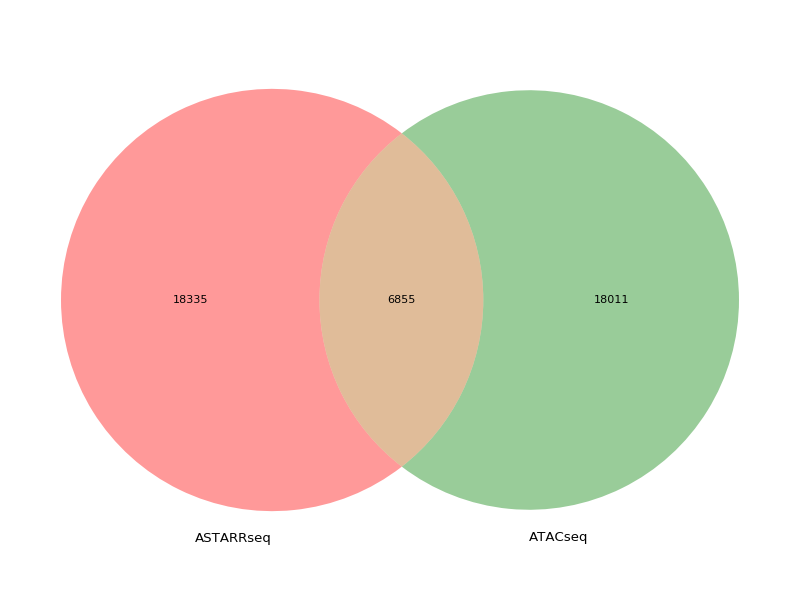

In [46]:
from IPython.display import display,Image
display(Image('/data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Treg_ASTARR_vs_ATAChits.png'))
    

In [43]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex
module load gcc
export PYTHONPATH="/data/reddylab/projects/GGR/analyses/group_general/top_level_scripts/GGR:${PYTHONPATH}"
python /data/reddylab/Alex/reddylab_utils/scripts/plot_overlap_as_venn_diagram.py \
  -i /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_astarr_hits_padj0.05.bed /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_atac_hits_padj0.05.bed \
  --names ASTARRseq ATACseq \
  -o /data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Treg_ASTARR_vs_ATAChits_significant.png /data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Treg_ASTARR_vs_ATAChits_significant.pdf \
  --bed

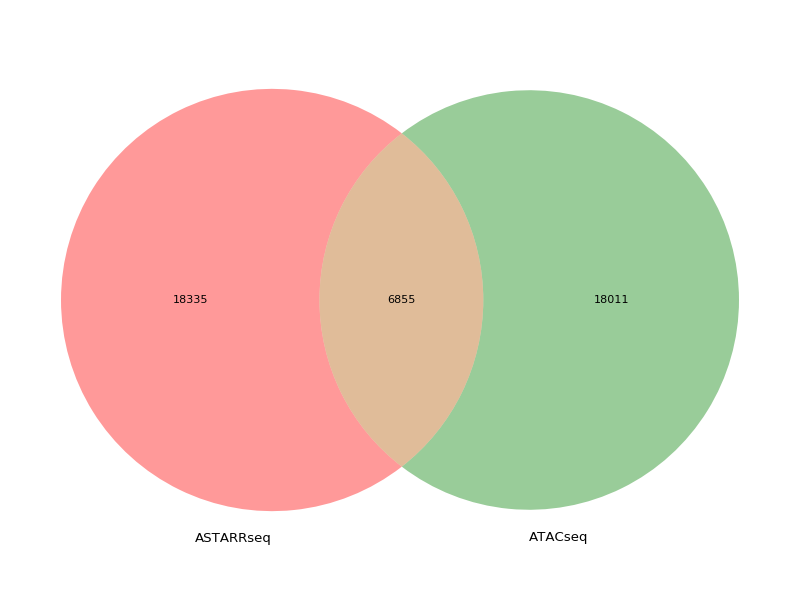

In [45]:
from IPython.display import display,Image
display(Image('/data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Treg_ASTARR_vs_ATAChits_significant.png'))
    

#### RUV corrected RNA data

In [21]:
import pandas as pd

RNA_RUV_genes = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/deseq/all/individual/mmTreg.Sorted.72hr_vs_mmTh0.Sorted.72hr.with_genes.txt', sep='\t')
RNA_RUV_genes = RNA_RUV_genes.rename(columns={'Unnamed: 0':'ENS_ID',
                                      'log2FoldChange':'RNA_log2FC',
                                      'padj':'RNA_padj'})
RNA_RUV_genes = RNA_RUV_genes[['ENS_ID','RNA_log2FC','RNA_padj','GeneName']]
RNA_RUV_genes = RNA_RUV_genes[RNA_RUV_genes['RNA_padj']<0.05]
RNA_RUV_genes.sort_values(by='RNA_log2FC', ascending=False)




,ENS_ID,RNA_log2FC,RNA_padj,GeneName
731,ENSMUSG00000009614.16,8.692365,2.401442e-25,Sardh
10333,ENSMUSG00000039521.12,8.345356,3.163764e-202,Foxp3
10001,ENSMUSG00000024910.4,7.180420,0.000000e+00,Ctsw
3860,ENSMUSG00000055541.17,6.985168,9.766557e-41,Lair1
2051,ENSMUSG00000028435.8,6.838331,2.430252e-119,Aqp3
5887,ENSMUSG00000019970.15,6.495529,4.601002e-191,Sgk1
8765,ENSMUSG00000000530.16,6.199628,6.646446e-80,Acvrl1
8562,ENSMUSG00000068246.5,6.052400,1.462503e-120,Apol9b
7804,ENSMUSG00000044258.9,5.919894,1.426511e-69,Ctla2a
2903,ENSMUSG00000029484.12,5.681087,9.540036e-37,Anxa3


#### 1. Find ATAC peaks with genes in 100kb window

In [27]:
%%bash 
module load bedtools2
bedtools window -a //data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_atac_hits_padj0.05.bed \
-b /data/reddylab/Revathy/collabs/Keith/data/annotation_files/gencode.vM19.basic.annotation.TSS.bed \
-w 100000 > /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_atac_hits_padj0.05_100kb_genes.txt

In [29]:
!head /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_atac_hits_padj0.05_100kb_genes.txt

chr3	152460900	152461972	4.78031522679872	5.261870110772018e-197	chr3_152460900_152461972	chr3	152395471	152395472	ENSMUSG00000039068.16	.	+	Zzz3	protein_coding
chr2	70091150	70093027	2.6719663183992997	1.9426914346399792e-196	chr2_70091150_70093027	chr2	70039124	70039125	ENSMUSG00000042064.13	.	+	Myo3b	protein_coding
chr4	47272170	47274564	1.81513788172957	7.270208850346827e-144	chr4_47272170_47274564	chr4	47208159	47208160	ENSMUSG00000028339.17	.	+	Col15a1	protein_coding
chr4	47272170	47274564	1.81513788172957	7.270208850346827e-144	chr4_47272170_47274564	chr4	47353220	47353221	ENSMUSG00000007613.15	.	+	Tgfbr1	protein_coding
chr8	120755517	120758125	4.22465819362272	5.8987622484681485e-142	chr8_120755517_120758125	chr8	120668078	120668079	ENSMUSG00000097919.1	.	-	Gm27021	protein_coding
chr8	120755517	120758125	4.22465819362272	5.8987622484681485e-142	chr8_120755517_120758125	chr8	120668120	120668121	ENSMUSG00000031819.13	.	-	Emc8	protein_coding
chr8	120755517	120758125	4.224658193622

#### 2. Intersect this with the RNA DE genes to obtain ATAC peaks with DE genes in the 100kb region

In [8]:
Treg_ATAC_sig_hits_100kb_genes = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_atac_hits_padj0.05_100kb_genes.txt', sep='\t',
                                              names=['chr','start','end','ATAC_log2FC','ATAC_padj','chr_start_end','gene_chr','gene_start','gene_end','ENS_ID','score','strand','GeneName','GeneType'])

Treg_ATAC_sig_hits_100kb_genes = Treg_ATAC_sig_hits_100kb_genes.merge(RNA_genes, on='GeneName', how='inner')

Treg_ATAC_sig_hits_100kb_genes = Treg_ATAC_sig_hits_100kb_genes[['chr','start','end','ATAC_log2FC','ATAC_padj','RNA_log2FC','RNA_padj','GeneName','chr_start_end']]
Treg_ATAC_sig_hits_100kb_genes.to_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_sig_hits_100kb_DE_genes.bed', sep='\t', header=None, index=False)
len(Treg_ATAC_sig_hits_100kb_genes.chr_start_end.unique())


16188

In [7]:
%%bash 
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Keith/Treg/data/starr_seq/220407_TregvsallPooledASTARR_allPooled_deseq2_q0.01.bed \
-b /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_sig_hits_100kb_DE_genes.bed \
-wa \
-wb \
> Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected.txt

***** WARNING: File /data/reddylab/Revathy/collabs/Keith/Treg/data/starr_seq/220407_TregvsallPooledASTARR_allPooled_deseq2_q0.01.bed has inconsistent naming convention for record:
JH584304.1	24323	24816	1.29851266347945	9.02871363691021e-20	JH584304.1_24323_24816

***** WARNING: File /data/reddylab/Revathy/collabs/Keith/Treg/data/starr_seq/220407_TregvsallPooledASTARR_allPooled_deseq2_q0.01.bed has inconsistent naming convention for record:
JH584304.1	24323	24816	1.29851266347945	9.02871363691021e-20	JH584304.1_24323_24816



In [8]:
!wc -l /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected.txt

8607 /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected.txt


In [9]:
!head /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected.txt

chr1	5018567	5021174	-0.295777498799096	0.0246868907491	chr1_5018567_5021174	chr1	5018634	5020555	-0.82872702456399	1.03145435312831e-06	0.650111950492743	4.3916163694491e-10	Atp6v1h	chr1_5018634_5020555
chr1	7100419	7100974	0.5780292895669871	0.0243761597464664	chr1_7100419_7100974	chr1	7100419	7100819	0.744685086705402	0.0305334049501795	0.421698892871097	0.000143917781571338	Pcmtd1	chr1_7100419_7100819
chr1	13311876	13313097	0.469398881327354	3.1920392055225605e-05	chr1_13311876_13313097	chr1	13311901	13312963	1.24771429817742	7.19273685127282e-06	-1.06339476695533	4.502317166632789e-49	Ncoa2	chr1_13311901_13312963
chr1	13382042	13384027	0.446284197240782	1.44966638113263e-05	chr1_13382042_13384027	chr1	13382997	13384016	-0.621528471420203	5.945295947886641e-06	-1.06339476695533	4.502317166632789e-49	Ncoa2	chr1_13382997_13384016
chr1	13464587	13465671	0.415985892551649	0.00883693749740993	chr1_13464587_13465671	chr1	13464587	13465611	1.16379050730319	4.75906349331164e-11	-1.06339476

In [10]:
%%bash
cat /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected.txt \
| awk -vOFS='\t' '{print $1, $2<$8?$2:$8, $3<$9?$3:$9, $0}' > /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered.txt


In [11]:
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered.txt', sep='\t',
                                                                        names=['chr','start','end',
                                                                               'ASTARR_chr','ASTARR_start','ASTARR_end','ASTARR_log2FC','ASTARR_padj','ASTARR_chr_start_end',
                                                                               'ATAC_chr','ATAC_start','ATAC_end','ATAC_log2FC','ATAC_padj','RNA_log2FC','RNA_padj','GeneName','ATAC_chr_start_end'])
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered = Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered[['chr','start','end','ATAC_log2FC','ATAC_padj','ASTARR_log2FC','ASTARR_padj','RNA_log2FC','RNA_padj','GeneName']]
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered['chr_start_end'] = Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered['chr'].astype('str')+'_'+Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered['start'].astype('str')+'_'+Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered['end'].astype('str')
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered


,chr,start,end,ATAC_log2FC,ATAC_padj,ASTARR_log2FC,ASTARR_padj,RNA_log2FC,RNA_padj,GeneName,chr_start_end
0,chr1,5018567,5020555,-0.828727,1.031454e-06,-0.295777,2.468689e-02,0.650112,4.391616e-10,Atp6v1h,chr1_5018567_5020555
1,chr1,7100419,7100819,0.744685,3.053340e-02,0.578029,2.437616e-02,0.421699,1.439178e-04,Pcmtd1,chr1_7100419_7100819
2,chr1,13311876,13312963,1.247714,7.192737e-06,0.469399,3.192039e-05,-1.063395,4.502317e-49,Ncoa2,chr1_13311876_13312963
3,chr1,13382042,13384016,-0.621528,5.945296e-06,0.446284,1.449666e-05,-1.063395,4.502317e-49,Ncoa2,chr1_13382042_13384016
4,chr1,13464587,13465611,1.163791,4.759063e-11,0.415986,8.836937e-03,-1.063395,4.502317e-49,Ncoa2,chr1_13464587_13465611
5,chr1,13639283,13639955,-0.300676,8.581368e-03,0.385372,1.086855e-03,0.275360,2.996611e-03,Lactb2,chr1_13639283_13639955
6,chr1,13752205,13753087,-1.808192,1.171527e-43,0.300529,2.784434e-03,0.275360,2.996611e-03,Lactb2,chr1_13752205_13753087
7,chr1,14902394,14902995,-3.048056,1.588016e-24,0.586110,2.354854e-03,-6.201412,1.607535e-46,Trpa1,chr1_14902394_14902995
8,chr1,16696025,16697094,0.881998,1.936494e-05,0.467254,1.536229e-02,-0.533028,7.211557e-09,Tmem70,chr1_16696025_16697094
9,chr1,20740323,20740999,-0.565786,1.868666e-07,0.328931,1.898331e-05,2.243005,3.559763e-99,Il17f,chr1_20740323_20740999


In [6]:
## peaks bed file

Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered = Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered[['chr','start','end']]
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered.to_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_RNA_ASTARR_intersected_peaks.bed', sep='\t', index=False, header=None)


In [7]:
!head /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_RNA_ASTARR_intersected_peaks.bed

chr1	5018567	5020555
chr1	7100419	7100819
chr1	13311876	13312963
chr1	13382042	13384016
chr1	13464587	13465611
chr1	13639283	13639955
chr1	13752205	13753087
chr1	14902394	14902995
chr1	16696025	16697094
chr1	20740323	20740999


In [1]:
%%bash
cd /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative
sbatch -p all \
    --cpus-per-task 1 \
    --mem 8G \
    -o /data/reddylab/Revathy/collabs/Keith/Treg/logs/Treg.72hr_vs_Th0.DE_genes_annotation.out \
    <<'EOF'
#!/bin/bash
SAMPLE="Treg_ATAC_RNA_ASTARR_intersected_peaks.bed"

tail -n+2 ${SAMPLE} \
| cut -f1,2,3 \
| awk -vOFS="\t" '{print $1, $2, $3, $1"_"$2"_"$3}' \
| sort -k1,1 -k2,2n \
| bedtools closest \
    -nonamecheck \
    -D a \
    -a - \
    -b /data/reddylab/Revathy/collabs/Keith/data/annotation_files/gencode.vM19.basic.annotation.TSS.bed \
| awk -vOFS="\t" \
    '{if(last==$4){genes=$11","genes;}else{if(genes){print peak, genes, distance}peak=$4; genes=$11; distance=$13; last=peak}}END{if(last==$4){genes=$11","genes;print peak, genes, distance}}' \
> ${SAMPLE/.bed/.gencode_closest_gene.txt}

EOF

Submitted batch job 27270287


In [2]:
!head /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_RNA_ASTARR_intersected_peaks.gencode_closest_gene.txt

chr1_7100419_7100819	Pcmtd1	-11501
chr1_13311876_13312963	Ncoa2	61120
chr1_13382042_13384016	Ncoa2	-7960
chr1_13464587_13465611	Ncoa2	-90505
chr1_13639283_13639955	Lactb2	20591
chr1_13752205_13753087	Xkr9	-83436
chr1_14902394_14902995	Trpa1	15867
chr1_16696025_16697094	Ly96	-7594
chr1_20740323_20740999	Il17a	-9420
chr1_20752326_20752847	Il17a	-21423


In [13]:
import pandas as pd

Treg_ATAC_RNA_ASTARR_intersected_peaks_closest_gene = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_RNA_ASTARR_intersected_peaks.gencode_closest_gene.txt', sep='\t',
                                                                   names=['chr_start_end','GeneName','distance'])

Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist = Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered.merge(Treg_ATAC_RNA_ASTARR_intersected_peaks_closest_gene, on='chr_start_end', how='inner')
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist = Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.drop(columns='GeneName_y')
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist = Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.rename(columns={'GeneName_x':'GeneName'})
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist


,chr,start,end,ATAC_log2FC,ATAC_padj,ASTARR_log2FC,ASTARR_padj,RNA_log2FC,RNA_padj,GeneName,chr_start_end,distance
0,chr1,7100419,7100819,0.744685,3.053340e-02,0.578029,2.437616e-02,0.421699,1.439178e-04,Pcmtd1,chr1_7100419_7100819,-11501
1,chr1,13311876,13312963,1.247714,7.192737e-06,0.469399,3.192039e-05,-1.063395,4.502317e-49,Ncoa2,chr1_13311876_13312963,61120
2,chr1,13382042,13384016,-0.621528,5.945296e-06,0.446284,1.449666e-05,-1.063395,4.502317e-49,Ncoa2,chr1_13382042_13384016,-7960
3,chr1,13464587,13465611,1.163791,4.759063e-11,0.415986,8.836937e-03,-1.063395,4.502317e-49,Ncoa2,chr1_13464587_13465611,-90505
4,chr1,13639283,13639955,-0.300676,8.581368e-03,0.385372,1.086855e-03,0.275360,2.996611e-03,Lactb2,chr1_13639283_13639955,20591
5,chr1,13752205,13753087,-1.808192,1.171527e-43,0.300529,2.784434e-03,0.275360,2.996611e-03,Lactb2,chr1_13752205_13753087,-83436
6,chr1,14902394,14902995,-3.048056,1.588016e-24,0.586110,2.354854e-03,-6.201412,1.607535e-46,Trpa1,chr1_14902394_14902995,15867
7,chr1,16696025,16697094,0.881998,1.936494e-05,0.467254,1.536229e-02,-0.533028,7.211557e-09,Tmem70,chr1_16696025_16697094,-7594
8,chr1,20740323,20740999,-0.565786,1.868666e-07,0.328931,1.898331e-05,2.243005,3.559763e-99,Il17f,chr1_20740323_20740999,-9420
9,chr1,20752326,20752847,-1.126768,3.170754e-04,0.444095,3.480384e-02,2.243005,3.559763e-99,Il17f,chr1_20752326_20752847,-21423


In [14]:
sig_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes = Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist[Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist['GeneName'].isin(sig_genes)]
Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes


,chr,start,end,ATAC_log2FC,ATAC_padj,ASTARR_log2FC,ASTARR_padj,RNA_log2FC,RNA_padj,GeneName,chr_start_end,distance
1539,chr11,97017907,97019137,-0.678977,2.382433e-04,-0.740575,1.535325e-09,1.244276,1.316731e-08,Tbx21,chr11_97017907_97019137,-4515
1543,chr11,97021352,97022582,-0.244187,4.569780e-02,-0.449554,4.555259e-05,1.244276,1.316731e-08,Tbx21,chr11_97021352_97022582,7355
1546,chr11,97149926,97153449,-0.764978,2.659470e-06,-0.373261,6.306778e-06,1.244276,1.316731e-08,Tbx21,chr11_97149926_97153449,0
1594,chr11,100849901,100851619,0.527950,2.667069e-05,-1.023971,1.209759e-20,0.751484,1.021305e-39,Stat3,chr11_100849901_100851619,0
1598,chr11,100851909,100853436,2.712722,4.291022e-91,0.395463,1.507539e-03,0.751484,1.021305e-39,Stat3,chr11_100851909_100853436,-1186
1602,chr11,100858027,100860900,0.380283,1.224707e-06,-0.303990,3.021765e-02,0.751484,1.021305e-39,Stat3,chr11_100858027_100860900,0
1605,chr11,100882949,100886442,1.218521,1.380096e-12,-0.294384,7.233945e-03,0.751484,1.021305e-39,Stat3,chr11_100882949_100886442,-23600
1608,chr11,100882949,100883698,1.039296,2.483448e-04,-0.294384,7.233945e-03,0.751484,1.021305e-39,Stat3,chr11_100882949_100883698,-23600
1611,chr11,100930837,100932009,1.344471,4.672208e-20,0.343294,1.159587e-03,0.751484,1.021305e-39,Stat3,chr11_100930837_100932009,7531
1615,chr11,100938687,100940237,0.403965,2.163881e-09,-0.274030,4.098015e-02,0.751484,1.021305e-39,Stat3,chr11_100938687_100940237,0


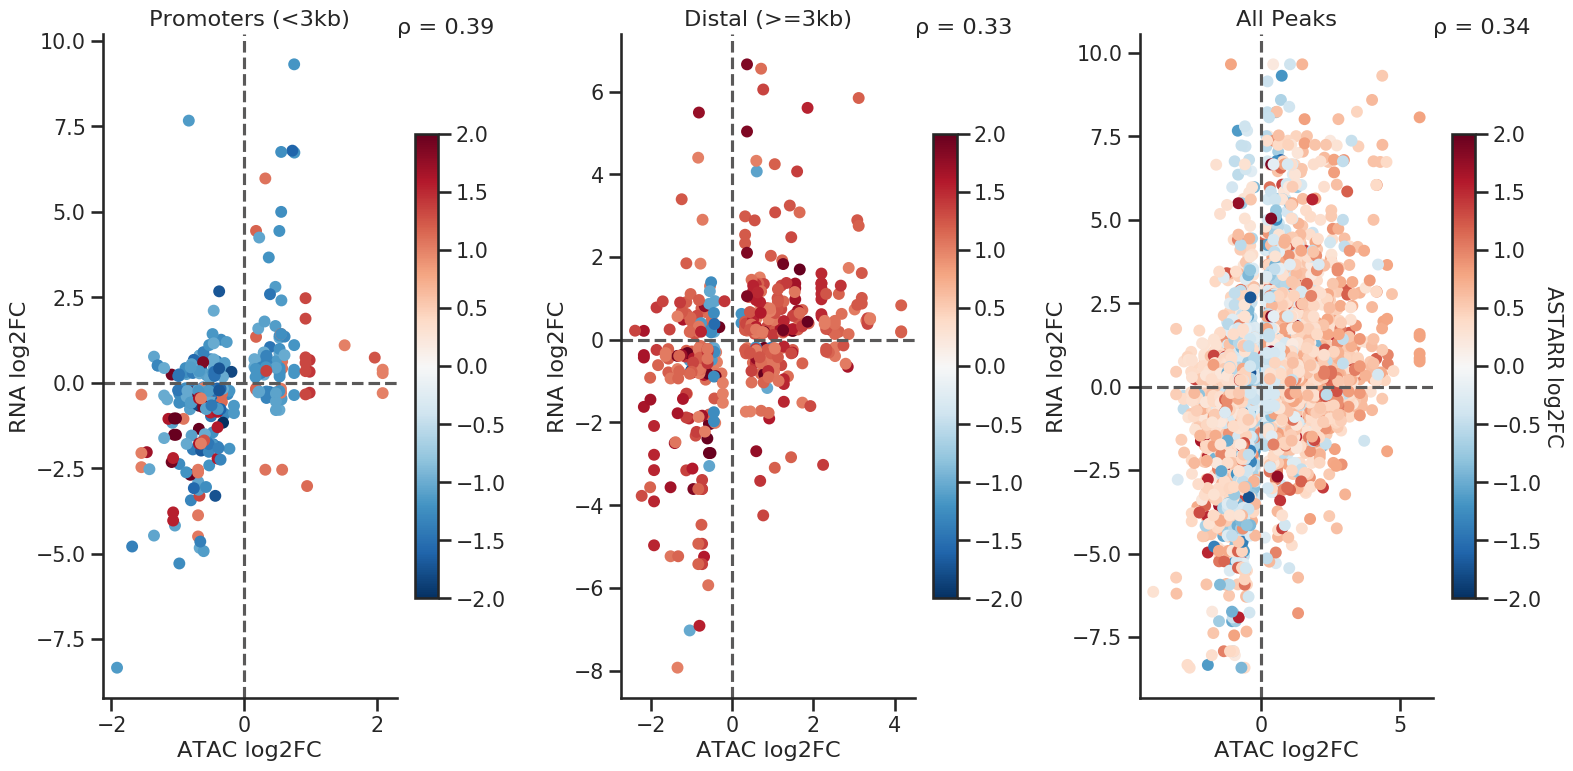

In [48]:
### Scatterplot for promoter(<3kb), distal(>=3kb) and all regions for ATACseq vs ASTARRseq

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(1, 1), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.9)
plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':100})

fig, ax = plt.subplots(1, 3)

ax1 = ax.flatten()[0]
points = ax1.scatter(
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000)&(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.ASTARR_log2FC)>1), 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000)&(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.ASTARR_log2FC)>1), 'RNA_log2FC'],
    c=Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000)&(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.ASTARR_log2FC)>1), 'ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

# for x, y, t in zip(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'ATAC_log2FC'],
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'RNA_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'GeneName']) :
#     ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)

# ax1.scatter(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'ATAC_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'RNA_log2FC'],
#     c=Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'ASTARR_log2FC'],
#     cmap='RdBu_r', marker='o', s=50)

corrfunc(
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000, 'RNA_log2FC'],
    ax=ax1, method='spearman')

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATAC log2FC')
ax1.set_ylabel('RNA log2FC')
ax1.set_title('Promoters (<3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax1)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-2,2)

ax2 = ax.flatten()[1]
points = ax2.scatter(
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000)&(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.ASTARR_log2FC)>1), 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000)&(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.ASTARR_log2FC)>1), 'RNA_log2FC'],
    c=Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000)&(np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.ASTARR_log2FC)>1), 'ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

# for x, y, t in zip(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'ATAC_log2FC'],
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'RNA_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'GeneName']) :
#     ax2.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
# ax2.scatter(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'ATAC_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'RNA_log2FC'],
#     c=Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'ASTARR_log2FC'],
#     cmap='RdBu_r', marker='o', s=50)

corrfunc(
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000, 'RNA_log2FC'],
    ax=ax2, method='spearman')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATAC log2FC')
ax2.set_ylabel('RNA log2FC')
ax2.set_title('Distal (>=3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax2)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-2,2)

ax3 = ax.flatten()[2]
points = ax3.scatter(
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'RNA_log2FC'],
    c=Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

# for x, y, t in zip(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'ATAC_log2FC'],
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'RNA_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'GeneName']) :
#     ax3.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
# ax3.scatter(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'ATAC_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'RNA_log2FC'],
#     c=Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'ASTARR_log2FC'],
#     cmap='RdBu_r', marker='o', s=50)

corrfunc(
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'RNA_log2FC'],
    ax=ax3, method='spearman')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')
ax3.set_xlabel('ATAC log2FC')
ax3.set_ylabel('RNA log2FC')
ax3.set_title('All Peaks')

cbar = fig.colorbar(points, shrink=0.7, ax=ax3)
cbar.set_label('ASTARR log2FC', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-2,2)

sns.despine(fig,ax)
plt.tight_layout()
#plt.savefig('/data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Th17_ATAC_100kb_RNA_DE_genes_ASTARR_distance_filtered_coordinate_plots_without_annotation.pdf')
plt.show()

### Integrative analysis with the RUV corrected RNA data

##### Intersect the ATAC hits with genes in the 100kb region with the RUV corrected RNA genes

In [22]:
Treg_ATAC_sig_hits_100kb_genes = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_atac_hits_padj0.05_100kb_genes.txt', sep='\t',
                                              names=['chr','start','end','ATAC_log2FC','ATAC_padj','chr_start_end','gene_chr','gene_start','gene_end','ENS_ID','score','strand','GeneName','GeneType'])

Treg_ATAC_sig_hits_100kb_RUV_genes = Treg_ATAC_sig_hits_100kb_genes.merge(RNA_RUV_genes, on='GeneName', how='inner')

Treg_ATAC_sig_hits_100kb_RUV_genes = Treg_ATAC_sig_hits_100kb_RUV_genes[['chr','start','end','ATAC_log2FC','ATAC_padj','RNA_log2FC','RNA_padj','GeneName','chr_start_end']]
Treg_ATAC_sig_hits_100kb_RUV_genes.to_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_sig_hits_100kb_RUV_DE_genes.bed', sep='\t', header=None, index=False)
len(Treg_ATAC_sig_hits_100kb_RUV_genes.chr_start_end.unique())


15012

In [23]:
%%bash 
module load bedtools2
cd /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/
bedtools intersect \
-a Treg_astarr_hits_padj0.05.bed \
-b Treg_ATAC_sig_hits_100kb_RUV_DE_genes.bed \
-wa \
-wb \
> Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected.txt

***** WARNING: File Treg_astarr_hits_padj0.05.bed has inconsistent naming convention for record:
GL456216.1	26944	27340	-1.6845683168553303	0.042724631235027	GL456216.1_26944_27340

***** WARNING: File Treg_astarr_hits_padj0.05.bed has inconsistent naming convention for record:
GL456216.1	26944	27340	-1.6845683168553303	0.042724631235027	GL456216.1_26944_27340



In [24]:
!wc -l /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected.txt

7480 /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected.txt


In [25]:
%%bash
cat /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected.txt \
| awk -vOFS='\t' '{print $1, $2<$8?$2:$8, $3<$9?$3:$9, $0}' > /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered.txt


In [32]:
Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered.txt', sep='\t',
                                                                        names=['chr','start','end',
                                                                               'ASTARR_chr','ASTARR_start','ASTARR_end','ASTARR_log2FC','ASTARR_padj','ASTARR_chr_start_end',
                                                                               'ATAC_chr','ATAC_start','ATAC_end','ATAC_log2FC','ATAC_padj','RNA_log2FC','RNA_padj','GeneName','ATAC_chr_start_end'])
Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered = Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered[['chr','start','end','ATAC_log2FC','ATAC_padj','ASTARR_log2FC','ASTARR_padj','RNA_log2FC','RNA_padj','GeneName']]
Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered['chr_start_end'] = Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered['chr'].astype('str')+'_'+Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered['start'].astype('str')+'_'+Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered['end'].astype('str')
Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered


,chr,start,end,ATAC_log2FC,ATAC_padj,ASTARR_log2FC,ASTARR_padj,RNA_log2FC,RNA_padj,GeneName,chr_start_end
0,chr1,5018567,5020555,-0.828727,1.031454e-06,-0.295777,2.468689e-02,0.530642,1.047431e-09,Atp6v1h,chr1_5018567_5020555
1,chr1,7100419,7100819,0.744685,3.053340e-02,0.578029,2.437616e-02,0.311881,1.211364e-02,Pcmtd1,chr1_7100419_7100819
2,chr1,13311876,13312963,1.247714,7.192737e-06,0.469399,3.192039e-05,-1.103578,7.727679e-54,Ncoa2,chr1_13311876_13312963
3,chr1,13382042,13384016,-0.621528,5.945296e-06,0.446284,1.449666e-05,-1.103578,7.727679e-54,Ncoa2,chr1_13382042_13384016
4,chr1,13464587,13465611,1.163791,4.759063e-11,0.415986,8.836937e-03,-1.103578,7.727679e-54,Ncoa2,chr1_13464587_13465611
5,chr1,13639283,13639955,-0.300676,8.581368e-03,0.385372,1.086855e-03,0.269126,1.832758e-02,Lactb2,chr1_13639283_13639955
6,chr1,13752205,13753087,-1.808192,1.171527e-43,0.300529,2.784434e-03,0.269126,1.832758e-02,Lactb2,chr1_13752205_13753087
7,chr1,16696025,16697094,0.881998,1.936494e-05,0.467254,1.536229e-02,0.209746,4.744417e-02,Ube2w,chr1_16696025_16697094
8,chr1,16696025,16697094,0.881998,1.936494e-05,0.467254,1.536229e-02,-0.642247,1.285648e-13,Tmem70,chr1_16696025_16697094
9,chr1,20740323,20740999,-0.565786,1.868666e-07,0.328931,1.898331e-05,2.440334,8.118530e-13,Il17f,chr1_20740323_20740999


In [27]:
## peaks bed file

Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered = Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered[['chr','start','end']]
Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered.to_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_RUV_RNA_ASTARR_intersected_peaks.bed', sep='\t', index=False, header=None)


In [28]:
%%bash
cd /data/reddylab/Revathy/collabs/Keith/Treg/data/integrative
sbatch -p all \
    --cpus-per-task 1 \
    --mem 8G \
    -o /data/reddylab/Revathy/collabs/Keith/Treg/logs/Treg.72hr_vs_Th0.RUV_DE_genes_annotation.out \
    <<'EOF'
#!/bin/bash
SAMPLE="Treg_ATAC_RUV_RNA_ASTARR_intersected_peaks.bed"

tail -n+2 ${SAMPLE} \
| cut -f1,2,3 \
| awk -vOFS="\t" '{print $1, $2, $3, $1"_"$2"_"$3}' \
| sort -k1,1 -k2,2n \
| bedtools closest \
    -nonamecheck \
    -D a \
    -a - \
    -b /data/reddylab/Revathy/collabs/Keith/data/annotation_files/gencode.vM19.basic.annotation.TSS.bed \
| awk -vOFS="\t" \
    '{if(last==$4){genes=$11","genes;}else{if(genes){print peak, genes, distance}peak=$4; genes=$11; distance=$13; last=peak}}END{if(last==$4){genes=$11","genes;print peak, genes, distance}}' \
> ${SAMPLE/.bed/.gencode_closest_gene.txt}

EOF

Submitted batch job 27270295


In [34]:
import pandas as pd

Treg_ATAC_RUV_RNA_ASTARR_intersected_peaks_closest_gene = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/integrative/Treg_ATAC_RUV_RNA_ASTARR_intersected_peaks.gencode_closest_gene.txt', sep='\t',
                                                                   names=['chr_start_end','GeneName','distance'])

Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist = Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered.merge(Treg_ATAC_RUV_RNA_ASTARR_intersected_peaks_closest_gene, on='chr_start_end', how='inner')
Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist = Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.drop(columns='GeneName_y')
Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist = Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.rename(columns={'GeneName_x':'GeneName'})
Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist


,chr,start,end,ATAC_log2FC,ATAC_padj,ASTARR_log2FC,ASTARR_padj,RNA_log2FC,RNA_padj,GeneName,chr_start_end,distance
0,chr1,7100419,7100819,0.744685,3.053340e-02,0.578029,2.437616e-02,0.311881,1.211364e-02,Pcmtd1,chr1_7100419_7100819,-11501
1,chr1,13311876,13312963,1.247714,7.192737e-06,0.469399,3.192039e-05,-1.103578,7.727679e-54,Ncoa2,chr1_13311876_13312963,61120
2,chr1,13382042,13384016,-0.621528,5.945296e-06,0.446284,1.449666e-05,-1.103578,7.727679e-54,Ncoa2,chr1_13382042_13384016,-7960
3,chr1,13464587,13465611,1.163791,4.759063e-11,0.415986,8.836937e-03,-1.103578,7.727679e-54,Ncoa2,chr1_13464587_13465611,-90505
4,chr1,13639283,13639955,-0.300676,8.581368e-03,0.385372,1.086855e-03,0.269126,1.832758e-02,Lactb2,chr1_13639283_13639955,20591
5,chr1,13752205,13753087,-1.808192,1.171527e-43,0.300529,2.784434e-03,0.269126,1.832758e-02,Lactb2,chr1_13752205_13753087,-83436
6,chr1,16696025,16697094,0.881998,1.936494e-05,0.467254,1.536229e-02,0.209746,4.744417e-02,Ube2w,chr1_16696025_16697094,-7594
7,chr1,16696025,16697094,0.881998,1.936494e-05,0.467254,1.536229e-02,-0.642247,1.285648e-13,Tmem70,chr1_16696025_16697094,-7594
8,chr1,20740323,20740999,-0.565786,1.868666e-07,0.328931,1.898331e-05,2.440334,8.118530e-13,Il17f,chr1_20740323_20740999,-9420
9,chr1,20752326,20752847,-1.126768,3.170754e-04,0.444095,3.480384e-02,2.440334,8.118530e-13,Il17f,chr1_20752326_20752847,-21423


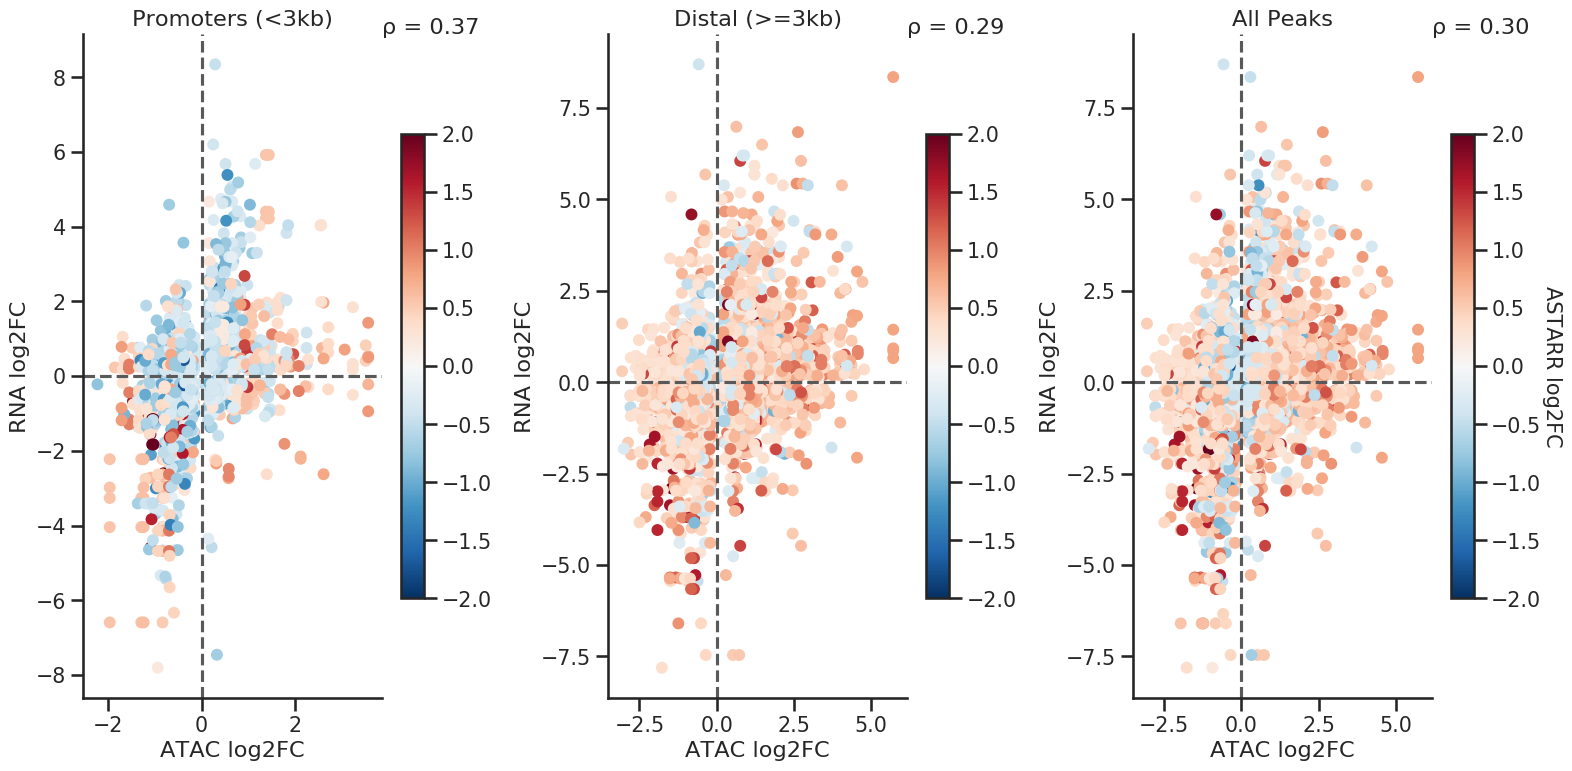

In [35]:
### Scatterplot for promoter(<3kb), distal(>=3kb) and all regions for ATACseq vs ASTARRseq

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(1, 1), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.9)
plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':100})

fig, ax = plt.subplots(1, 3)

ax1 = ax.flatten()[0]
points = ax1.scatter(
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000, 'RNA_log2FC'],
    c=Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000, 'ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

# for x, y, t in zip(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'ATAC_log2FC'],
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'RNA_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'GeneName']) :
#     ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)

# ax1.scatter(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'ATAC_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'RNA_log2FC'],
#     c=Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)<3000, 'ASTARR_log2FC'],
#     cmap='RdBu_r', marker='o', s=50)

corrfunc(
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)<3000, 'RNA_log2FC'],
    ax=ax1, method='spearman')

ax1.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax1.get_ylim())
ax1.vlines(0, ax1.get_ylim()[0], ax1.get_ylim()[1], color='#5A5959', linestyle='--')
ax1.hlines(0, ax1.get_xlim()[0], ax1.get_xlim()[1], color='#5A5959', linestyle='--')
ax1.set_xlabel('ATAC log2FC')
ax1.set_ylabel('RNA log2FC')
ax1.set_title('Promoters (<3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax1)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-2,2)

ax2 = ax.flatten()[1]
points = ax2.scatter(
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000, 'RNA_log2FC'],
    c=Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000, 'ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

# for x, y, t in zip(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'ATAC_log2FC'],
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'RNA_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'GeneName']) :
#     ax2.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
# ax2.scatter(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'ATAC_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'RNA_log2FC'],
#     c=Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[np.abs(Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.distance)>=3000, 'ASTARR_log2FC'],
#     cmap='RdBu_r', marker='o', s=50)

corrfunc(
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[np.abs(Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.distance)>=3000, 'RNA_log2FC'],
    ax=ax2, method='spearman')

ax2.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax2.get_ylim())
ax2.vlines(0, ax2.get_ylim()[0], ax2.get_ylim()[1], color='#5A5959', linestyle='--')
ax2.hlines(0, ax2.get_xlim()[0], ax2.get_xlim()[1], color='#5A5959', linestyle='--')
ax2.set_xlabel('ATAC log2FC')
ax2.set_ylabel('RNA log2FC')
ax2.set_title('Distal (>=3kb)')

cbar = fig.colorbar(points, shrink=0.7, ax=ax2)
#cbar.set_label('ASTARR log2FoldChange', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-2,2)

ax3 = ax.flatten()[2]
points = ax3.scatter(
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'RNA_log2FC'],
    c=Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'ASTARR_log2FC'],
    cmap='RdBu_r', marker='o', s=50, label='All hits')

# for x, y, t in zip(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'ATAC_log2FC'],
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'RNA_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'GeneName']) :
#     ax3.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=15)
    
# ax3.scatter(
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'ATAC_log2FC'], 
#     Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'RNA_log2FC'],
#     c=Th17_ATAC_100kb_RNA_DE_genes_ASTARR_intersected_filtered_with_dist_spGenes.loc[:, 'ASTARR_log2FC'],
#     cmap='RdBu_r', marker='o', s=50)

corrfunc(
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'ATAC_log2FC'], 
    Treg_ATAC_100kb_RNA_RUV_DE_genes_ASTARR_intersected_filtered_with_dist.loc[:, 'RNA_log2FC'],
    ax=ax3, method='spearman')

ax3.set_xlim(ax3.get_xlim())
ax3.set_ylim(ax3.get_ylim())
ax3.vlines(0, ax3.get_ylim()[0], ax3.get_ylim()[1], color='#5A5959', linestyle='--')
ax3.hlines(0, ax3.get_xlim()[0], ax3.get_xlim()[1], color='#5A5959', linestyle='--')
ax3.set_xlabel('ATAC log2FC')
ax3.set_ylabel('RNA log2FC')
ax3.set_title('All Peaks')

cbar = fig.colorbar(points, shrink=0.7, ax=ax3)
cbar.set_label('ASTARR log2FC', rotation=270, labelpad=15, fontsize=15)
cbar.mappable.set_clim(-2,2)

sns.despine(fig,ax)
plt.tight_layout()
#plt.savefig('/data/reddylab/Revathy/collabs/Keith/data/integrative/plots/Th17_ATAC_100kb_RNA_DE_genes_ASTARR_distance_filtered_coordinate_plots_without_annotation.pdf')
plt.show()